In [1]:
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

D:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


retrain/images/QQ图片20180710092413.jpg


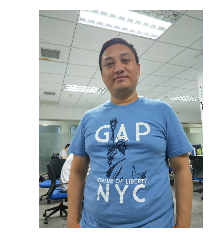

[0 1]
励正华 (score=0.89510)
王博 (score=0.10490)

retrain/images/QQ图片20180710093923.jpg


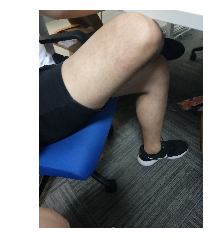

[1 0]
王博 (score=0.77115)
励正华 (score=0.22885)

retrain/images/QQ截图20180710094318.png


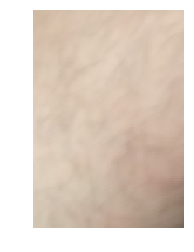

[1 0]
王博 (score=0.80194)
励正华 (score=0.19806)



In [2]:
lines=tf.gfile.GFile('retrain/output_labels.txt').readlines()
uid_to_human={}
#一行一行读取数据
for uid,line in enumerate(lines):
    #去掉换行符
    line=line.strip('\n')
    uid_to_human[uid]=line
    
def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ''
    return uid_to_human[node_id]

#创建一个图来存放google训练好的模型
with tf.gfile.FastGFile('retrain/output_graph.pb','rb') as f:
    graph_def=tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def,name='')
    
with tf.Session() as sess:
    softmax_tensor=sess.graph.get_tensor_by_name('final_result:0')
    #遍历目录
    for root,dirs,files in os.walk('retrain/images/'):
        for file in files:
            #载入图片
            image_data=tf.gfile.FastGFile(os.path.join(root,file),'rb').read()
            predictions=sess.run(softmax_tensor,{'DecodeJpeg/contents:0':image_data})#图片格式是jpg格式
            predictions=np.squeeze(predictions)#把结果转为1维数据
            
            #打印图片路径及名称
            image_path=os.path.join(root,file)
            print(image_path)
            #显示图片
            img=Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            
            #排序
            top_k=predictions.argsort()[::-1]
            print(top_k)
            for node_id in top_k:
                #获取分类名称
                human_string=id_to_string(node_id)
                #获取该分类的置信度
                score=predictions[node_id]
                print('%s (score=%.5f)'%(human_string,score))
            print()